# Lab  #4

First and Last Name: Lam Nguyen

Student ID: 500838417

Video URL: -----------------------

#Neural Networks

In [ ]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import tensorflow as tf
from tensorflow import keras
import sklearn.metrics as metrics

#keras
from keras.models import Sequential
from keras.layers import Input, Dense
from keras import initializers

In [ ]:
# Reproducible Results
import random as rn
import os

os.environ['PYTHONHASHSEED'] = '42'

# Setting the seed for numpy-generated random numbers
np.random.seed(42)

# Setting the seed for Python random number
rn.seed(42)

# Setting the seed for TensorFlow random number
tf.random.set_seed(42)

# Force TensorFlow to use a single thread
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)


## Implementation Steps

### Generate dataset

In [ ]:
def generate_X(size):
  np.random.seed(42)
  X = np.random.uniform(-1, 1, size=size)
  return X

def generate_y(X):
  y = 0.2*np.power(X, 4) + 2*np.power(X, 3) + 0.1*np.power(X, 2) + 10
  return y 

def get_dataset(shuffle=False, size=10000, random_state=0):
  X = generate_X(size=size)
  y = generate_y(X=X)
  data = np.c_[X, y]

  if shuffle:
    np.random.seed(random_state)
    np.random.shuffle(data)
  
  return data

### Split data function

In [ ]:
def split_data(data, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
  assert train_ratio + val_ratio + test_ratio == 1.0, "train_ratio + val_ratio + test_ratio should equal 1.0"
  assert data.shape[0] >= 2, "data should have at least two rows"

  train_size = int(train_ratio * data.shape[0])
  val_size = int(val_ratio * data.shape[0])
    
  train_data = data[:train_size]
  val_data = data[train_size:train_size+val_size]
  test_data = data[train_size+val_size:]
    
  return train_data, val_data, test_data

### Scale data function

In [ ]:
def scale_data(data):
  min_vals = np.min(data, axis=0)
  max_vals = np.max(data, axis=0)
  scaled_data = (data - min_vals) / (max_vals - min_vals)
    
  return scaled_data

### Error calculation functions

In [ ]:
def mae(actual, predicted):
  mae = np.mean(np.abs(actual - predicted)) 
  return mae

def mse(actual, predicted):
  mse = np.mean((actual - predicted) ** 2)
  return mse

def rmse(actual, predicted):
  mse = np.mean((actual - predicted) ** 2)
  rmse = np.sqrt(mse)
  return rmse

def r2(actual, predicted):
  ss_tot = np.sum((actual - np.mean(actual)) ** 2)
  ss_res = np.sum((actual - predicted) ** 2)
  r2 = 1 - (ss_res / ss_tot)
  return r2

def get_errors(actual, predicted):
  print(f'MAE: {mae(actual, predicted)}')
  print(f'MSE: {mse(actual, predicted)}')
  print(f'RMSE: {rmse(actual, predicted)}')
  print(f'R2: {r2(actual, predicted)}')

###Models creation function

In [ ]:
def create_model(structure=1, activation='relu'):
  available_structure = [1, 2]
  available_activation = ['relu', 'tanh']

  assert structure in available_structure, 'structure must be either 1 or 2'
  assert activation in available_activation, 'activation must be either \'relu\' or \'tanh\''

  model = Sequential()
  model.add(Input(shape=(1,)))

  if structure == 1: 
    model.add(Dense(units=12, activation=activation, 
                    kernel_initializer=initializers.RandomNormal(mean=0. , stddev=1., seed=42),
                    bias_initializer=initializers.Zeros()))
    model.add(Dense(units=8, activation=activation))
    model.add(Dense(units=4, activation=activation))
    model.add(Dense(units=1, activation=activation))

  else:
    model.add(Dense(units=24, activation=activation, 
                    kernel_initializer=initializers.RandomNormal(mean=0. , stddev=1., seed=42),
                    bias_initializer=initializers.Zeros()))
    model.add(Dense(units=1, activation=activation))

  model.summary()
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

  return model

###Plotting function

In [ ]:
def create_plot(X_test, y_test, y_pred, case):

  assert isinstance(case, int), 'case must be an integer'

  plt.figure(figsize=(12,4))

  plt.subplot(1, 2, 1)
  plt.scatter(X_test, y_test)
  plt.title('Actual test data')
  plt.grid()

  plt.subplot(1, 2, 2)
  plt.scatter(X_test, y_pred)
  plt.title('Predicted data')
  plt.grid()

  plt.tight_layout(h_pad=1.0)
  plt.suptitle(f'Plots for case {case}', fontsize=16)
  plt.subplots_adjust(top=0.8)
  plt.show();

## Data preprocessing 

In [ ]:
# Shuffled data
shuffled_data = get_dataset(shuffle=True, size=30000, random_state=42)

# Unshuffled data
unshuffled_data = get_dataset(shuffle=False, size=30000, random_state=42)

In [ ]:
# Shuffled and unscaled data 
train_data_1, val_data_1, test_data_1 = split_data(data=shuffled_data, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5)

X1_train, y1_train = train_data_1[:, [0]], train_data_1[:, [1]]
X1_val, y1_val = val_data_1[:, [0]], val_data_1[:, [1]]
X1_test, y1_test = test_data_1[:, [0]], test_data_1[:, [1]]

In [ ]:
# Shuffled and scaled data
train_data_2 = scale_data(data=train_data_1)
val_data_2 = scale_data(data=val_data_1)
test_data_2 = scale_data(data=test_data_1)

X2_train, y2_train = train_data_2[:, [0]], train_data_2[:, [1]]
X2_val, y2_val = val_data_2[:, [0]], val_data_2[:, [1]]
X2_test, y2_test = test_data_2[:, [0]], test_data_2[:, [1]]

In [ ]:
# Unshuffled and unscaled data 
train_data_3, val_data_3, test_data_3 = split_data(data=unshuffled_data, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5)

X3_train, y3_train = train_data_3[:, [0]], train_data_3[:, [1]]
X3_val, y3_val = val_data_3[:, [0]], val_data_3[:, [1]]
X3_test, y3_test = test_data_3[:, [0]], test_data_3[:, [1]]

In [ ]:
# Unshuffled and scaled data
train_data_4 = scale_data(data=train_data_3)
val_data_4 = scale_data(data=val_data_3)
test_data_4 = scale_data(data=test_data_3)

X4_train, y4_train = train_data_4[:, [0]], train_data_4[:, [1]]
X4_val, y4_val = val_data_4[:, [0]], val_data_4[:, [1]]
X4_test, y4_test = test_data_4[:, [0]], test_data_4[:, [1]]

## Model training

### Case 1

**Data:** Use shuffled and unscaled data

**NN structure:** 
* FCL (12 units ) - first hidden layer
* FCL (8 units ) - second hidden layer
* FCL (4 units ) - last hidden layer

**Activation function:** Relu

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                24        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


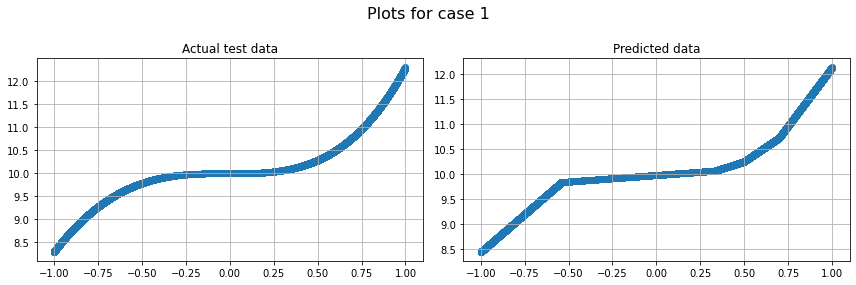

MAE: 0.033185190719767554
MSE: 0.001908230538653855
RMSE: 0.04368329816593357
R2: 0.9966725258402693


In [ ]:
# Create model
model_1 = create_model(structure=1, activation='relu')

# Fit data
history_1 = model_1.fit(X1_train, y1_train, epochs=20, batch_size=12, verbose=0, validation_data=(X1_val, y1_val))

# Make predictions
y1_pred = model_1.predict(X1_test, verbose=0)

# Plot the actual data and predicted data
create_plot(X1_test, y1_test, y1_pred, case=1)

# Errors
get_errors(y1_test, y1_pred)

### Case 2

**Data:** Use shuffled and unscaled data

**NN structure:** 
* FCL (24 units ) - one hidden layer

**Activation function:** Relu

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 24)                48        
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


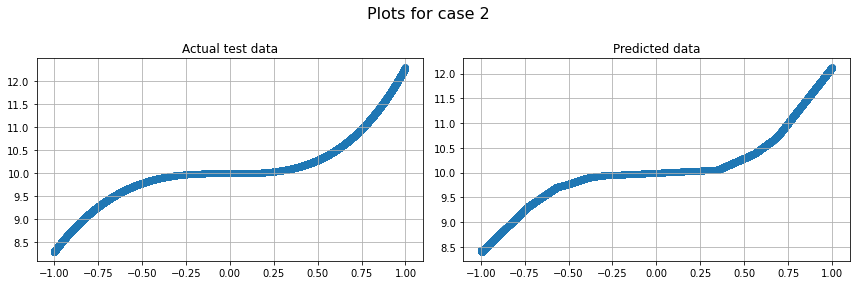

MAE: 0.02110862460486543
MSE: 0.0009434660036568898
RMSE: 0.030715891711895486
R2: 0.9983548325612862


In [ ]:
# Create model
model_2 = create_model(structure=2, activation='relu')

# Fit data
history_2 = model_2.fit(X1_train, y1_train, epochs=20, batch_size=12, verbose=0, validation_data=(X1_val, y1_val))

# Make predictions
y2_pred = model_2.predict(X1_test, verbose=0)

# Plot the actual data and predicted data
create_plot(X1_test, y1_test, y2_pred, case=2)

# Errors
get_errors(y1_test, y2_pred)

### Case 3

**Data:** Use shuffled and unscaled data

**NN structure:** 
* FCL (12 units ) - first hidden layer
* FCL (8 units ) - second hidden layer
* FCL (4 units ) - last hidden layer

**Activation function:** Tanh

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                24        
                                                                 
 dense_7 (Dense)             (None, 8)                 104       
                                                                 
 dense_8 (Dense)             (None, 4)                 36        
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


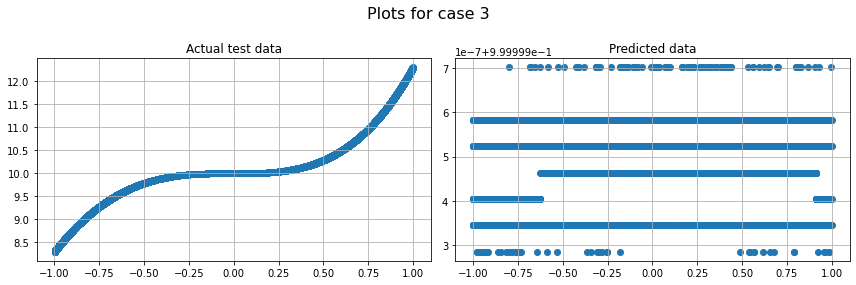

MAE: 9.076430140146645
MSE: 82.95506127039744
RMSE: 9.107966912017051
R2: -143.65276454009853


In [ ]:
# Create model
model_3 = create_model(structure=1, activation='tanh')

# Fit data
history_3 = model_3.fit(X1_train, y1_train, epochs=20, batch_size=12, verbose=0, validation_data=(X1_val, y1_val))

# Make predictions
y3_pred = model_3.predict(X1_test, verbose=0)

# Plot the actual data and predicted data
create_plot(X1_test, y1_test, y3_pred, case=3)

# Errors
get_errors(y1_test, y3_pred)

### Case 4

**Data:** Use shuffled and scaled data. First, shuffle the data then split
the data and finally scale the data (both X and y).

**NN structure:** 
* FCL (12 units ) - first hidden layer
* FCL (8 units ) - second hidden layer
* FCL (4 units ) - last hidden layer

**Activation function:** Relu

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 12)                24        
                                                                 
 dense_11 (Dense)            (None, 8)                 104       
                                                                 
 dense_12 (Dense)            (None, 4)                 36        
                                                                 
 dense_13 (Dense)            (None, 1)                 5         
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


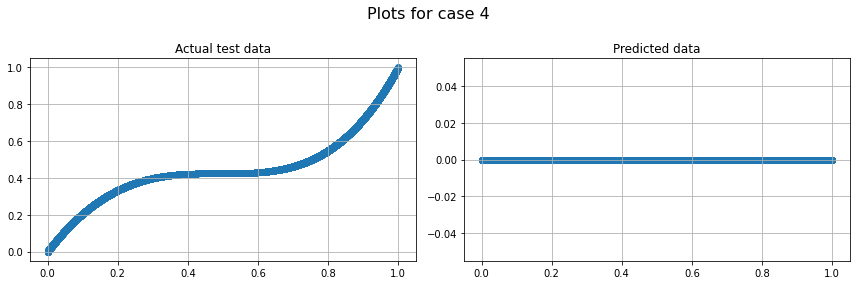

MAE: 0.4442080969108146
MSE: 0.23318410981071497
RMSE: 0.48289140581575374
R2: -5.502030291027642


In [ ]:
# Create model
model_4 = create_model(structure=1, activation='relu')

# Fit data
history_4 = model_4.fit(X2_train, y2_train, epochs=20, batch_size=12, verbose=0, validation_data=(X2_val, y2_val))

# Make predictions
y4_pred = model_4.predict(X2_test, verbose=0)

# Plot the actual data and predicted data
create_plot(X2_test, y2_test, y4_pred, case=4)

# Errors
get_errors(y2_test, y4_pred)

### Case 5

**Data:** Use shuffled and scaled data. First, shuffle the data then split
the data and finally scale the data (both X and y).

**NN structure:** 
* FCL (12 units ) - first hidden layer
* FCL (8 units ) - second hidden layer
* FCL (4 units ) - last hidden layer

**Activation function:** Tanh

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 12)                24        
                                                                 
 dense_15 (Dense)            (None, 8)                 104       
                                                                 
 dense_16 (Dense)            (None, 4)                 36        
                                                                 
 dense_17 (Dense)            (None, 1)                 5         
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


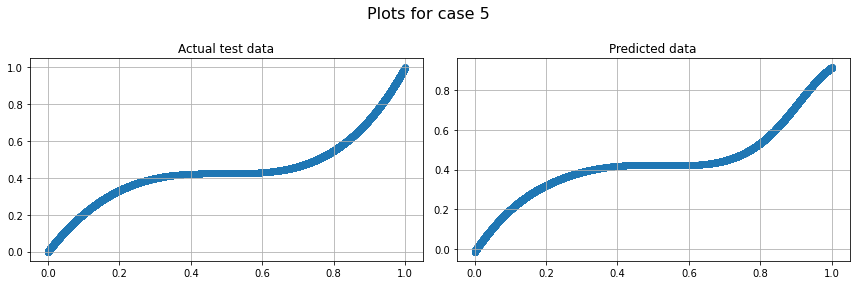

MAE: 0.010518327637773493
MSE: 0.00021042517718983456
RMSE: 0.014506039335043682
R2: 0.9941325724244513


In [ ]:
# Create model
model_5 = create_model(structure=1, activation='tanh')

# Fit data
history_5 = model_5.fit(X2_train, y2_train, epochs=20, batch_size=12, verbose=0, validation_data=(X2_val, y2_val))

# Make predictions
y5_pred = model_5.predict(X2_test, verbose=0)

# Plot the actual data and predicted data
create_plot(X2_test, y2_test, y5_pred, case=5)

# Errors
get_errors(y2_test, y5_pred)

### Case 6

**Data:** Use unshuffled and unscaled data

**NN structure:** 
* FCL (12 units ) - first hidden layer
* FCL (8 units ) - second hidden layer
* FCL (4 units ) - last hidden layer

**Activation function:** Relu

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 12)                24        
                                                                 
 dense_19 (Dense)            (None, 8)                 104       
                                                                 
 dense_20 (Dense)            (None, 4)                 36        
                                                                 
 dense_21 (Dense)            (None, 1)                 5         
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


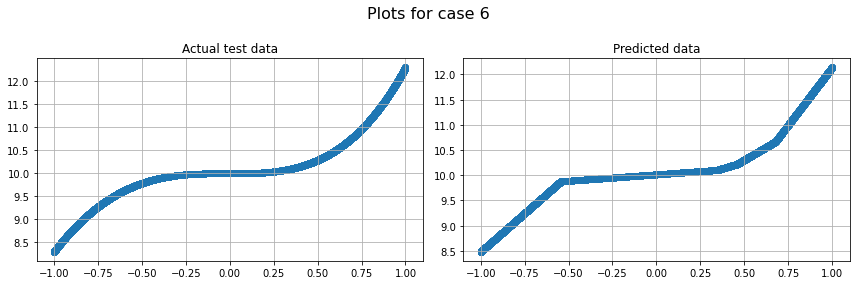

MAE: 0.036197597630286404
MSE: 0.0025261163253644846
RMSE: 0.05026048473069559
R2: 0.9955970173508948


In [ ]:
# Create model
model_6 = create_model(structure=1, activation='relu')

# Fit data
history_6 = model_6.fit(X3_train, y3_train, epochs=20, batch_size=12, verbose=0, validation_data=(X3_val, y3_val))

# Make predictions
y6_pred = model_6.predict(X3_test, verbose=0)

# Plot the actual data and predicted data
create_plot(X3_test, y3_test, y6_pred, case=6)

# Errors
get_errors(y3_test, y6_pred)

### Case 7

**Data:** Use unshuffled and unscaled data

**NN structure:** 
* FCL (24 units ) - one hidden layer

**Activation function:** Relu

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 24)                48        
                                                                 
 dense_23 (Dense)            (None, 1)                 25        
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


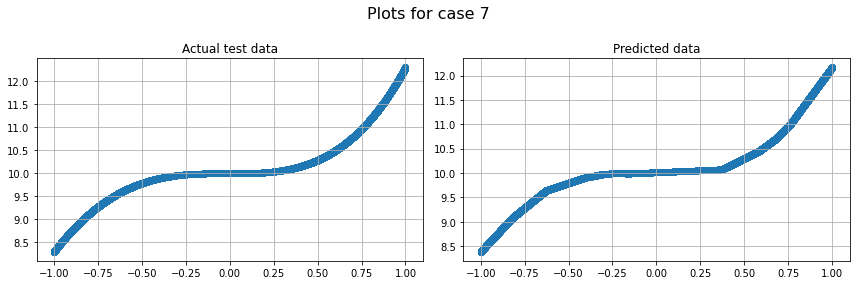

MAE: 0.01972889352801272
MSE: 0.0007069879837491866
RMSE: 0.026589245640844843
R2: 0.9987677306091103


In [ ]:
# Create model
model_7 = create_model(structure=2, activation='relu')

# Fit data
history_7 = model_7.fit(X3_train, y3_train, epochs=20, batch_size=12, verbose=0, validation_data=(X3_val, y3_val))

# Make predictions
y7_pred = model_7.predict(X3_test, verbose=0)

# Plot the actual data and predicted data
create_plot(X3_test, y3_test, y7_pred, case=7)

# Errors
get_errors(y3_test, y7_pred)

### Case 8

**Data:** Use unshuffled and unscaled data

**NN structure:** 
* FCL (12 units ) - first hidden layer
* FCL (8 units ) - second hidden layer
* FCL (4 units ) - last hidden layer

**Activation function:** Tanh

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 12)                24        
                                                                 
 dense_25 (Dense)            (None, 8)                 104       
                                                                 
 dense_26 (Dense)            (None, 4)                 36        
                                                                 
 dense_27 (Dense)            (None, 1)                 5         
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


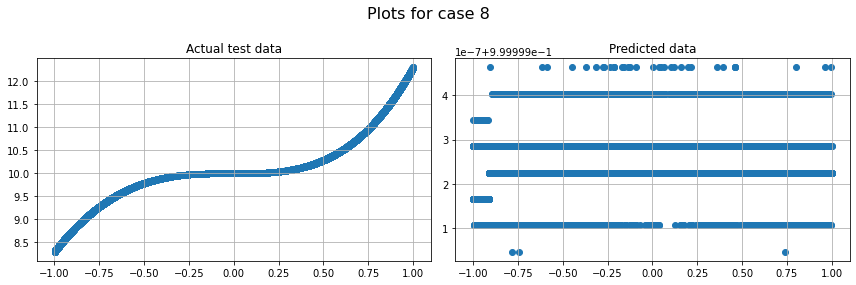

MAE: 9.076629726988475
MSE: 82.95893562272705
RMSE: 9.108179599828226
R2: -143.59617336996726


In [ ]:
# Create model
model_8 = create_model(structure=1, activation='tanh')

# Fit data
history_8 = model_8.fit(X3_train, y3_train, epochs=20, batch_size=12, verbose=0, validation_data=(X3_val, y3_val))

# Make predictions
y8_pred = model_8.predict(X3_test, verbose=0)

# Plot the actual data and predicted data
create_plot(X3_test, y3_test, y8_pred, case=8)

# Errors
get_errors(y3_test, y8_pred)

### Case 9

**Data:** Use unshuffled and scaled data. First, shuffle the data then split
the data and finally scale the data (both X and y).

**NN structure:** 
* FCL (12 units ) - first hidden layer
* FCL (8 units ) - second hidden layer
* FCL (4 units ) - last hidden layer

**Activation function:** Relu

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 12)                24        
                                                                 
 dense_29 (Dense)            (None, 8)                 104       
                                                                 
 dense_30 (Dense)            (None, 4)                 36        
                                                                 
 dense_31 (Dense)            (None, 1)                 5         
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


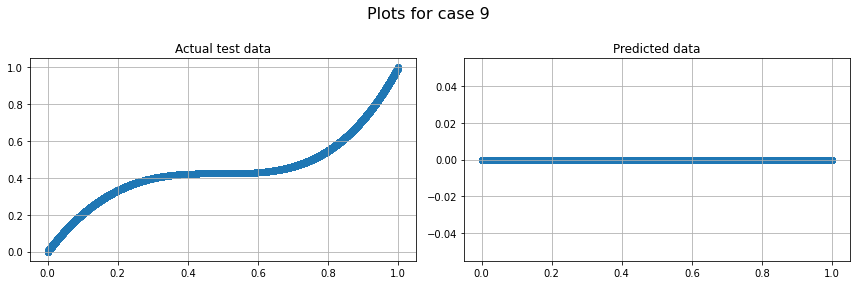

MAE: 0.44420724171816894
MSE: 0.23320560965795567
RMSE: 0.48291366687841386
R2: -5.498596237992562


In [ ]:
# Create model
model_9 = create_model(structure=1, activation='relu')

# Fit data
history_9 = model_9.fit(X4_train, y4_train, epochs=20, batch_size=12, verbose=0, validation_data=(X4_val, y4_val))

# Make predictions
y9_pred = model_9.predict(X4_test, verbose=0)

# Plot the actual data and predicted data
create_plot(X4_test, y4_test, y9_pred, case=9)

# Errors
get_errors(y4_test, y9_pred)

### Case 10

**Data:** Use unshuffled and scaled data. First, shuffle the data then split
the data and finally scale the data (both X and y).

**NN structure:** 
* FCL (12 units ) - first hidden layer
* FCL (8 units ) - second hidden layer
* FCL (4 units ) - last hidden layer

**Activation function:** Tanh

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 12)                24        
                                                                 
 dense_33 (Dense)            (None, 8)                 104       
                                                                 
 dense_34 (Dense)            (None, 4)                 36        
                                                                 
 dense_35 (Dense)            (None, 1)                 5         
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


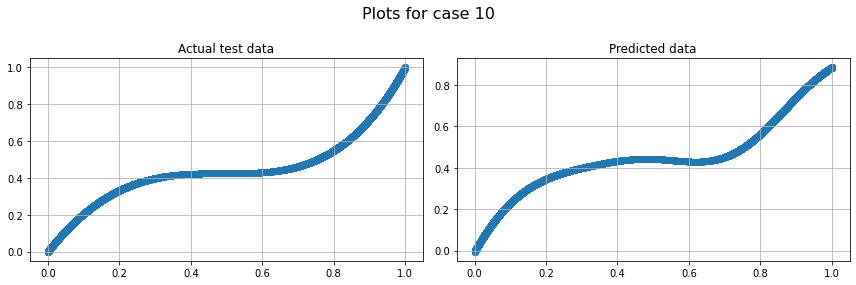

MAE: 0.014732901632432868
MSE: 0.00044595083287533096
RMSE: 0.021117547984444856
R2: 0.9875729644363879


In [ ]:
# Create model
model_10 = create_model(structure=1, activation='tanh')

# Fit data
history_10 = model_10.fit(X4_train, y4_train, epochs=20, batch_size=12, verbose=0, validation_data=(X4_val, y4_val))

# Make predictions
y10_pred = model_10.predict(X4_test, verbose=0)

# Plot the actual data and predicted data
create_plot(X4_test, y4_test, y10_pred, case=10)

# Errors
get_errors(y4_test, y10_pred)

## Solving XOR problem

### Truth table 

In [ ]:
# Implement truth table
truth_table = {
    'A': [0, 0, 1, 1],
    'B': [0, 1, 0, 1],
    'Q': [0, 1, 1, 0]
}

df = pd.DataFrame(truth_table)
df

,A,B,Q
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [ ]:
X = np.array(df.drop('Q', axis=1)).T
y = np.array([df['Q']])

print(X.shape)
print(y.shape)

(2, 4)
(1, 4)


### Activation function

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def derivative_sigmoid(s):
  return s * (1-s)

### Neural network for XOR problem

In [ ]:
class NeuralNetwork:
  def __init__(self, learning_rate, epochs, verbose=True):
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.verbose = verbose 

    self.units = 2
    self.n_samples = 2
    self.n_outputs = 1

  def initialize_weights(self):
    np.random.seed(42)
    self.w1 = np.random.rand(self.units, self.n_samples)
    self.w2 = np.random.rand(self.n_outputs, self.units)

  def forward_propagation(self, X):
    z1 = np.dot(self.w1, X)
    a1 = sigmoid(z1)    
    z2 = np.dot(self.w2, a1)
    return z1, a1, z2, sigmoid(z2)

  def backward_propagation(self, z1, a1, z2, out, X, y):
    dz2 = out - y 
    dw2 = np.dot(dz2,a1.T)/a1.shape[1]
    dz1 = np.dot(self.w2.T,dz2) * derivative_sigmoid(a1)
    dw1 = np.dot(dz1,X.T)/X.shape[1]    
    return dw2, dw1

  def fit(self, X, y):
    self.initialize_weights()
    self.losses = []
    m = X.shape[1]

    for i in range(self.epochs):
      z1, a1, z2, out = self.forward_propagation(X)
      # Binary cross-entropy
      loss = -(1/m)*np.sum(y*np.log(out)+(1-y)*np.log(1-out))
      self.losses.append(loss)
      dw2, dw1 = self.backward_propagation(z1, a1, z2, out, X, y)
      self.w2 -= self.learning_rate*dw2
      self.w1 -= self.learning_rate*dw1

      if self.verbose == True:
        if (i+1)%1000 == 0:
          print(f'Epoch: {i+1} ----> cost: {self.losses[i]:.2f}')

  def predict(self, input):
    _, _, _, probability = self.forward_propagation(input)
    return 1 if probability >= 0.5 else 0, probability

### Fitting and predict data

In [ ]:
# Initialize model
xor = NeuralNetwork(learning_rate=0.1, epochs=20000, verbose=True)

xor.fit(X, y)

Epoch: 1000 ----> cost: 0.69
Epoch: 2000 ----> cost: 0.69
Epoch: 3000 ----> cost: 0.69
Epoch: 4000 ----> cost: 0.67
Epoch: 5000 ----> cost: 0.61
Epoch: 6000 ----> cost: 0.53
Epoch: 7000 ----> cost: 0.47
Epoch: 8000 ----> cost: 0.42
Epoch: 9000 ----> cost: 0.37
Epoch: 10000 ----> cost: 0.34
Epoch: 11000 ----> cost: 0.31
Epoch: 12000 ----> cost: 0.28
Epoch: 13000 ----> cost: 0.26
Epoch: 14000 ----> cost: 0.24
Epoch: 15000 ----> cost: 0.22
Epoch: 16000 ----> cost: 0.21
Epoch: 17000 ----> cost: 0.20
Epoch: 18000 ----> cost: 0.18
Epoch: 19000 ----> cost: 0.17
Epoch: 20000 ----> cost: 0.17


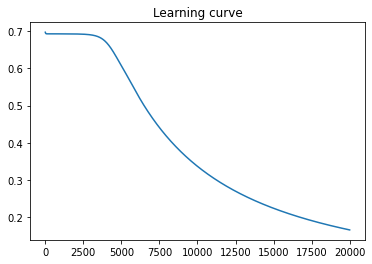

In [ ]:
# Plot the learning curve 

plt.plot(xor.losses)
plt.title('Learning curve')
plt.show()

In [ ]:
# Sovle XOR problem
output_00, p_00 = xor.predict([[0], [0]])
output_01, p_01 = xor.predict([[0], [1]])
output_10, p_10 = xor.predict([[1], [0]])
output_11, p_11 = xor.predict([[1], [1]])

print(f'For input [0, 0], output is {output_00} with probability {p_00[0][0]:.2f}')
print(f'For input [0, 1], output is {output_01} with probability {p_01[0][0]:.2f}')
print(f'For input [1, 0], output is {output_10} with probability {p_10[0][0]:.2f}')
print(f'For input [1, 1], output is {output_11} with probability {p_11[0][0]:.2f}')

For input [0, 0], output is 0 with probability 0.03
For input [0, 1], output is 1 with probability 0.93
For input [1, 0], output is 1 with probability 0.93
For input [1, 1], output is 0 with probability 0.12
